In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('poverty.txt', sep='\t')

In [3]:
data.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

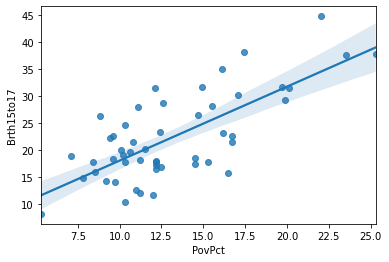

In [5]:
sns.regplot(data = data, x='PovPct', y = 'Brth15to17')
plt.show()

In [6]:
inputs = data[['PovPct']]
inputs.head()

,PovPct
0,20.1
1,7.1
2,16.1
3,14.9
4,16.7


In [7]:
outputs = data[['Brth15to17']]
outputs.head()

,Brth15to17
0,31.5
1,18.9
2,35.0
3,31.6
4,22.6


In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2)
reg1 = LinearRegression()
reg1 = reg1.fit(X_train, y_train)

In [17]:
y_predict = reg1.predict(X_test)
y_predict

array([[33.58068601],
       [35.46044107],
       [18.91859651],
       [26.68825078],
       [21.5502536 ],
       [21.29961959],
       [27.4401528 ],
       [20.04644955],
       [31.19966293],
       [19.79581554],
       [30.94902892]])

In [19]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values,
                  'Prediction' : pd.DataFrame(y_predict)[0].values})
df

,Actual,Prediction
0,44.8,33.580686
1,37.6,35.460441
2,17.7,18.918597
3,15.7,26.688251
4,23.4,21.550254
5,17.7,21.299620
6,30.1,27.440153
7,18.2,20.046450
8,31.5,31.199663
9,12.5,19.795816


In [20]:
m = reg1.coef_[0]
b = reg1.intercept_
print("Coefficients: ", m)
print("Intercept: ",b)

Coefficients:  [1.25317004]
Intercept:  [6.01094508]


In [22]:
print("Mean squared error: %.2f" % mean_squared_error(outputs, reg1.predict(inputs)))
print("Variance Score: %.2f "% reg1.score(inputs, outputs))

Mean squared error: 29.89
Variance Score: 0.53 


In [23]:
#Score = 53% => mo hinh phu hop 53% du lieu -> chua la mo hinh tot

In [27]:
#check score of train and test
print(reg1.score(X_train, y_train))

0.4266476129598935


In [28]:
print(reg1.score(X_test, y_test))

0.675054546114684


In [30]:
#score cua training > testing -> co the bi overfitting


In [31]:
reg_line = reg1.predict(inputs)

In [38]:
x_now = [[15]]
y_now = reg1.predict(x_now)

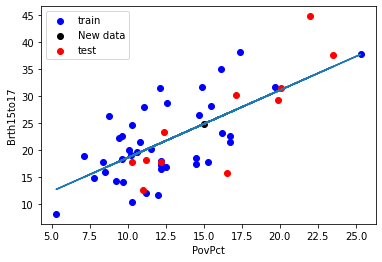

In [39]:
plt.scatter(x=X_train, y = y_train, color = 'blue', label= 'train')
plt.scatter(x=x_now, y = y_now, color = 'black', label= 'New data')
plt.scatter(x=X_test, y = y_test, color = 'red', label= 'test')
plt.plot(inputs,reg_line)
plt.xlabel('PovPct')
plt.ylabel('Brth15to17')
plt.legend()
plt.show()